# Data Preprocessing Utilities

In [31]:
import numpy as np
import cv2 as cv
from medpy.filter.smoothing import anisotropic_diffusion
import medpy
import torchvision
import os
import cv2
import json
import shutil
from glob import glob
import matplotlib.pyplot as plt

Function to perform standard cleanup on an ultrasound image

Standard processing:
- Load the image
- Enhance contrast with CLAHE
- Reduce noise with anisotropic diffusion (pending)
- Resize to target size for CNN (optional)

In [38]:
def cleanup_image(imgpath,resize = False,targetsize = (224,224),trim_margins = False,verbose = False):

  img = cv.imread(imgpath,cv.IMREAD_GRAYSCALE)
  if verbose:
    print("Dimensions of image:",img.shape)

  # CLAHE contrast enhancement
  assert img is not None, "file could not be read, check whether os.path.exists()"
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_c = clahe.apply(img)
  if verbose:
    print("Dimensions after CLAHE:",img_c.shape)
    print("Type after CLAHE:",img_c.dtype)

  ''' Medpy isn't working yet, throws a dimension error
  # Anisotropic noise reduction
  # try saving from CV and loading in MedPy's image format
  # also note this will probably change dtype to float
  cv.imwrite('temp.jpg',img_c)
  img_c2 = medpy.io.load('temp.jpg')
  img_cf = anisotropic_diffusion(img_c2)
  if verbose:
    print("Dimensions after denoise:",img_cf.shape)
    print("Type after denoise:",img_c.dtype)
  '''
    
  # resize
  if resize:
    img_cfr = cv.resize(img_c, targetsize, interpolation=cv.INTER_CUBIC)
    if verbose:
      print("Dimensions after resize:",img_cfr.shape)
      print("Type after resize:",img_cfr.dtype)

  # trim_margins: optional parameter, 
  #   if we wanted to add in the function to trim the ultrasound annotation stuff here

  # optionally show the progression of images
  if verbose:
    images = cv.hconcat([img,img_c])
    #plt.imshow(img)
    plt.imshow(images,cmap='gray')
    #plt.imshow(img_cfr)
    plt.show()
    plt.imshow(img_cfr,cmap='gray')
    plt.show()

  return img_cfr



Example usage of the cleanup_image code

Dimensions of image: (576, 768)
Dimensions after CLAHE: (576, 768)
Type after CLAHE: uint8
Dimensions after resize: (224, 224)
Type after resize: uint8


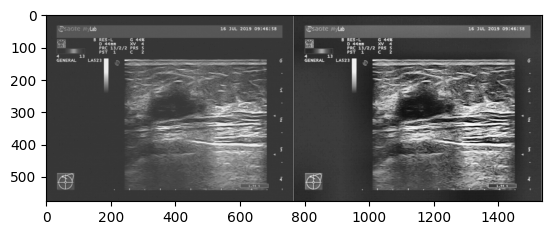

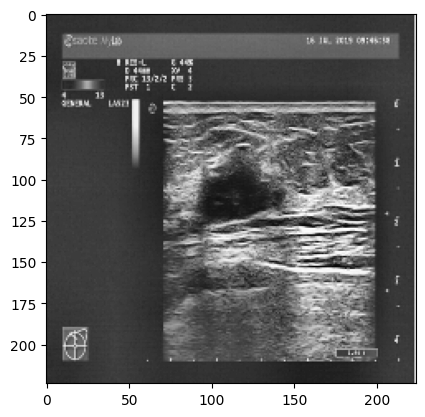

In [39]:
data_basepath = "C:/GTMS Projects/Practicum/AIPlus_BC_Practicum/"
data_path = data_basepath+"Ultrasound/malignant/"
img_list = glob(os.path.join(data_path, '*/*.jpg'))

img_orig_path = img_list[222]

img_clean = cleanup_image(img_orig_path,resize=True,verbose=True)

Loop through all the AI+ images, cleanup, export to 1 folder

In [41]:
data_basepath = 'C:/GTMS Projects/Practicum/AIPlus_BC_Practicum/'

# Iterate through all images: malignant and benign

for diag in ['malignant','benign']:

  data_path = data_basepath+'Ultrasound/'+diag+'/'
  img_list = glob(os.path.join(data_path, '*/*.jpg'))
  json_list = glob(os.path.join(data_path, '*/*.json'))
  img_des_path = data_basepath+'clean/'

  for img in img_list:
    # some other stuff here to get the JSON formats right, including the benign/malignant tags for classification
    # save all the images + metadata to one big folder for training & testing
    pass
